In [4]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

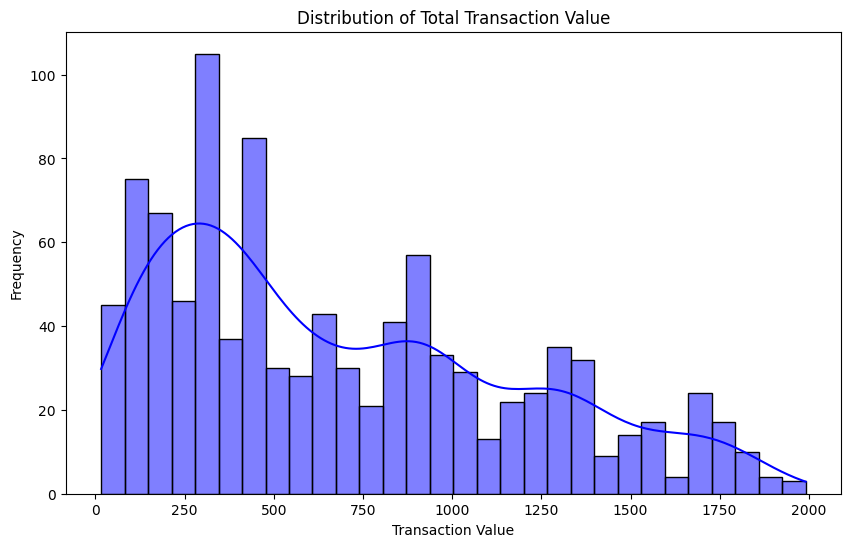

Transaction Value Summary Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


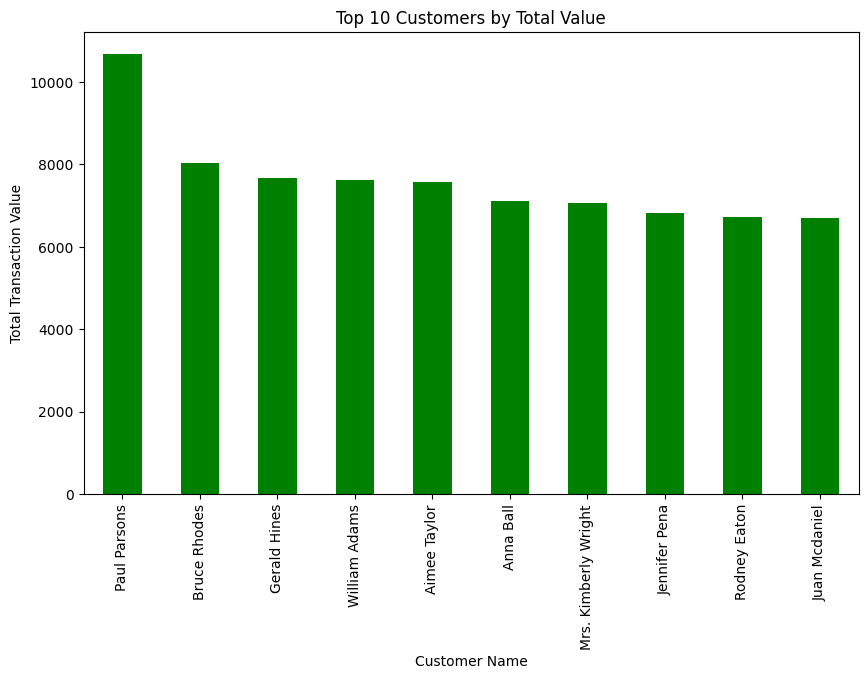

Top 10 customers contribute 11.02% of total revenue.
Top 3 categories contribute 78.13% of total sales.


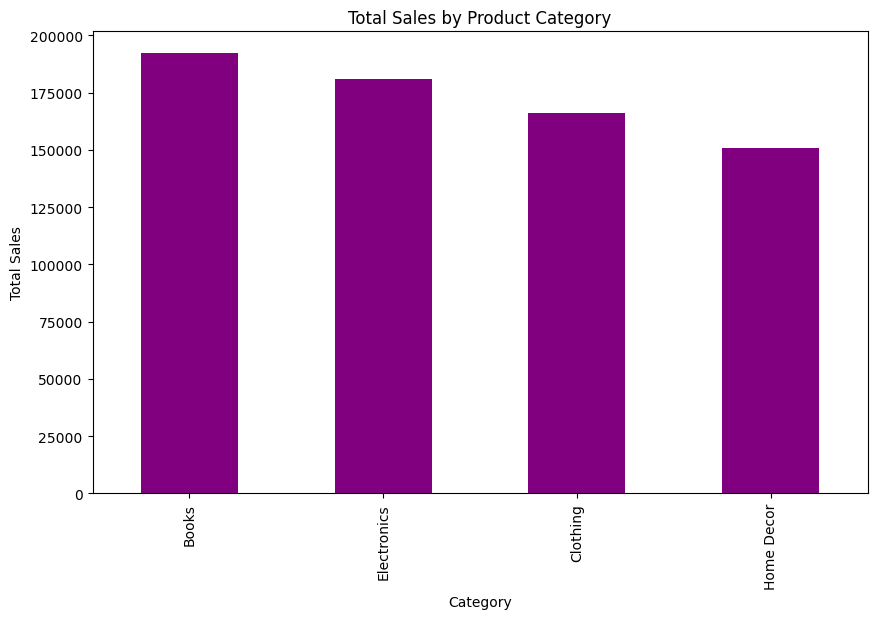

Regional Performance (% Contribution):
Region
Asia             22.039993
Europe           24.095029
North America    22.074548
South America    31.790431
Name: TotalValue, dtype: float64


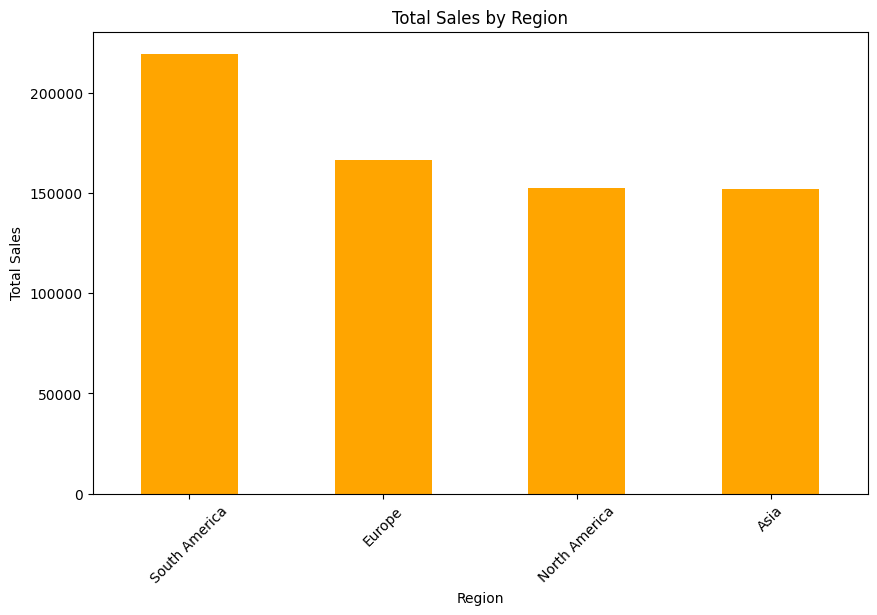

Business Insights:
1. Top 10 customers account for a significant portion of revenue, suggesting a few key accounts drive business.
2. Product categories with the highest sales can help focus marketing efforts on top-performing categories.
3. Regional analysis indicates that certain regions consistently outperform others in sales, highlighting areas for expansion.
4. The distribution of transaction values shows a skew, suggesting a majority of transactions are of lower value while a few are very high.
5. High customer retention in the top customer list suggests building loyalty programs for these customers would be beneficial.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Inspect the data
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())

# Merge datasets for EDA
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

# Data cleaning
print("Checking for missing values:\n", merged_data.isnull().sum())

# Fill missing values or drop rows/columns if necessary
merged_data = merged_data.dropna()

# Descriptive statistics
print("Summary statistics:\n", merged_data.describe())

# Exploratory Visualizations
## Distribution of Total Transaction Value
plt.figure(figsize=(10, 6))
sns.histplot(merged_data["TotalValue"], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for transaction values
transaction_summary = merged_data["TotalValue"].describe()
print("Transaction Value Summary Statistics:")
print(transaction_summary)

## Top 10 Customers by Total Value
top_customers = merged_data.groupby('CustomerName')["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Total Value')
plt.xlabel('Customer Name')
plt.ylabel('Total Transaction Value')
plt.show()
# Top 10 customers' contribution
top_10_revenue = merged_data.groupby("CustomerName")["TotalValue"].sum().nlargest(10).sum()
contribution = (top_10_revenue / total_revenue) * 100
print(f"Top 10 customers contribute {contribution:.2f}% of total revenue.")


# Top 3 product categories' contribution
top_categories_sales = merged_data.groupby("Category")["TotalValue"].sum().nlargest(3).sum()
category_contribution = (top_categories_sales / total_revenue) * 100
print(f"Top 3 categories contribute {category_contribution:.2f}% of total sales.")


## Product Category Analysis
category_sales = merged_data.groupby('Category')["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Regional Performance
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
total_sales = region_sales.sum()

# Calculate percentage contribution for each region
region_performance = (region_sales / total_sales) * 100

print("Regional Performance (% Contribution):")
print(region_performance)

# Visualize regional sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
region_sales.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Insight generation
insights = [
    "Top 10 customers account for a significant portion of revenue, suggesting a few key accounts drive business.",
    "Product categories with the highest sales can help focus marketing efforts on top-performing categories.",
    "Regional analysis indicates that certain regions consistently outperform others in sales, highlighting areas for expansion.",
    "The distribution of transaction values shows a skew, suggesting a majority of transactions are of lower value while a few are very high.",
    "High customer retention in the top customer list suggests building loyalty programs for these customers would be beneficial."
]

print("Business Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


In [1]:
total_revenue = merged_data["TotalValue"].sum()
top_10_revenue = merged_data.groupby("CustomerName")["TotalValue"].sum().nlargest(10).sum()
contribution = (top_10_revenue / total_revenue) * 100
print(f"Top 10 customers contribute {contribution:.2f}% of total revenue.")


<class 'NameError'>: name 'merged_data' is not defined

In [2]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets for EDA
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")


In [3]:
# Calculate total revenue
total_revenue = merged_data["TotalValue"].sum()

# Top 10 customers' contribution
top_10_revenue = merged_data.groupby("CustomerName")["TotalValue"].sum().nlargest(10).sum()
contribution = (top_10_revenue / total_revenue) * 100
print(f"Top 10 customers contribute {contribution:.2f}% of total revenue.")

# Top 3 product categories' contribution
top_categories_sales = merged_data.groupby("Category")["TotalValue"].sum().nlargest(3).sum()
category_contribution = (top_categories_sales / total_revenue) * 100
print(f"Top 3 categories contribute {category_contribution:.2f}% of total sales.")


Top 10 customers contribute 11.02% of total revenue.
Top 3 categories contribute 78.13% of total sales.


In [5]:
%pip install seaborn


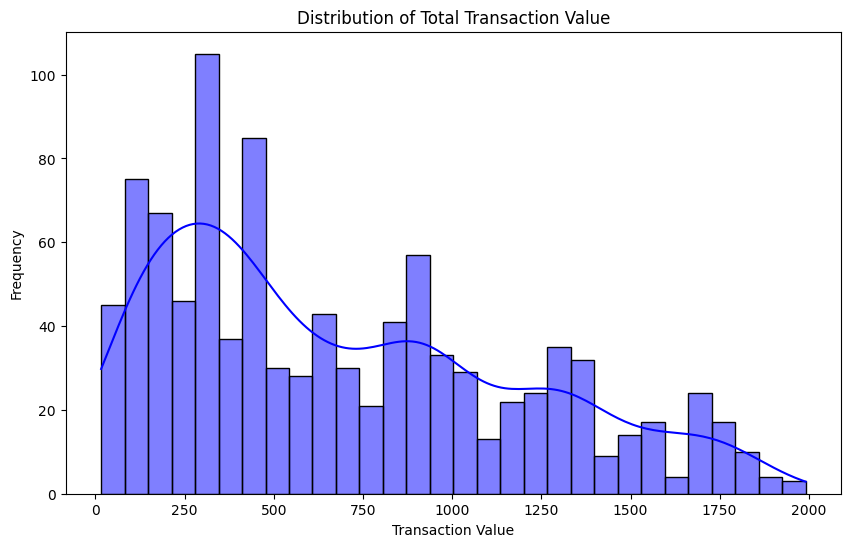

Transaction Value Summary Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [7]:
# Transaction Value Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(merged_data["TotalValue"], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for transaction values
transaction_summary = merged_data["TotalValue"].describe()
print("Transaction Value Summary Statistics:")
print(transaction_summary)


Regional Performance (% Contribution):
Region
Asia             22.039993
Europe           24.095029
North America    22.074548
South America    31.790431
Name: TotalValue, dtype: float64


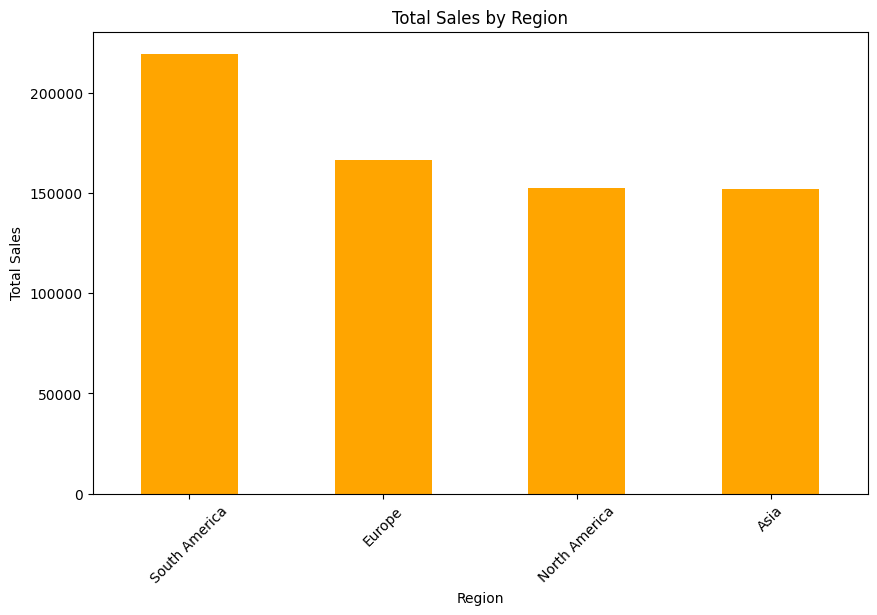

In [8]:
# Regional Performance
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
total_sales = region_sales.sum()

# Calculate percentage contribution for each region
region_performance = (region_sales / total_sales) * 100

print("Regional Performance (% Contribution):")
print(region_performance)

# Visualize regional sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
region_sales.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
